In [1]:
import numpy as np
import pandas
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

In [2]:
'''

Comparing which items in the Urquhart catalog (RMS_LarsonStats.txt) are the same as those in the RAMPS catalog (RAMPS_clump_catalog_diss_data.txt) by location

'''

RAMPS_data = pandas.read_csv('RAMPS_clump_catalog_diss_data.txt', sep='\s+')
Urquhart_data = pandas.read_csv('/users/hfwest/GBO-REU/Butterfield_plotting/RMS_LarsonStats.txt', sep='\s+')
# RAMPS_data
Urquhart_data

,Name,Size,FWHM
0,G010.283-00.118,0.317844,2.4
1,G010.288-00.166,0.127991,1.8
2,G010.296-00.148,0.195186,4.2
3,G010.323-00.165,0.233583,1.7
4,G010.346-00.148,0.148256,1.8
...,...,...,...
101,G058.492+00.440,0.415970,4.2
102,G059.787+00.067,0.357308,1.4
103,G075.751+00.342,0.209730,3.9
104,G075.791+00.335,0.208373,2.4


In [3]:
Urquhart_long = np.array([])
Urquhart_lat = np.array([])

for sourceName in Urquhart_data['Name']:
    Urquhart_long = np.append(Urquhart_long, float(sourceName[1:8]))
    fac = 1
    if sourceName[8] == '-':
        fac = -1
    Urquhart_lat = np.append(Urquhart_lat, fac * float(sourceName[9::]))

Urquhart_size = np.array(Urquhart_data['Size']).astype(float)
Urquhart_sigma = np.array(Urquhart_data['FWHM']).astype(float) / (2 * np.sqrt(2 *(np.log(2))))  # Convert from FWHM to sigma

RAMPS_long = np.array([])
RAMPS_lat = np.array([])
RAMPS_size = np.array([])
RAMPS_sigma = np.array([])

skippedFirst = False
for i in range(len(RAMPS_data)):
    if not skippedFirst:
        skippedFirst = True
        continue  # Skip the first row, which is just units
    RAMPS_long = np.append(RAMPS_long, float(RAMPS_data['ClumpName'][i][1:7]))
    fac = 1
    if RAMPS_data['ClumpName'][i][7] == '-':
        fac = -1
    RAMPS_lat = np.append(RAMPS_lat, fac * float(RAMPS_data['ClumpName'][i][8::]))
    RAMPS_size = np.append(RAMPS_size, float(RAMPS_data['theta_maj'][i]) * float(RAMPS_data['d1'][i]) * 1000 * np.pi/(60*180))
    RAMPS_sigma = np.append(RAMPS_sigma, float(RAMPS_data['sigma'][i]))

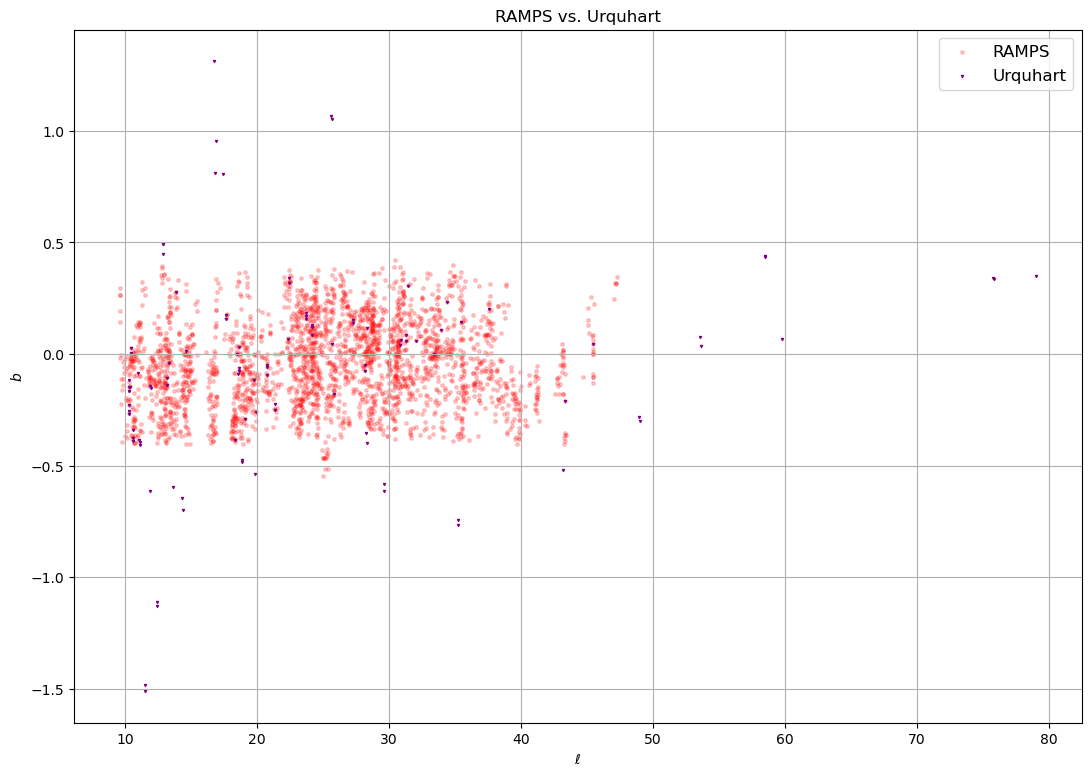

In [4]:
plt.figure(figsize=(13, 9))
plt.scatter(RAMPS_long, RAMPS_lat, marker = '.', s = 25, label='RAMPS', color = 'red', alpha = 0.2)
plt.scatter(Urquhart_long, Urquhart_lat, marker = 'v', s=2, label = 'Urquhart', color = 'purple')
plt.legend(fontsize = 'large')
# plt.show()
plt.title('RAMPS vs. Urquhart')
plt.xlabel('$\ell$')
plt.ylabel('$b$')
plt.grid()
plt.savefig('/users/hfwest/GBO-REU/plots/RAMPS_vs_Urquhart.png')

In [5]:
Urquhart_DF = pandas.DataFrame(np.array([Urquhart_long, Urquhart_lat, Urquhart_size, Urquhart_sigma]).T, columns = ['l', 'b', 'Linear Size (pc)', 'sigma (km/s)'])
RAMPS_DF = pandas.DataFrame(np.array([RAMPS_long, RAMPS_lat, RAMPS_size, RAMPS_sigma]).T, columns = ['l', 'b', 'Linear Size (pc)', 'sigma (km/s)'])

Urquhart_DF.to_csv('/users/hfwest/GBO-REU/Urquhart_cleaned.csv', index=False)
RAMPS_DF.to_csv('/users/hfwest/GBO-REU/RAMPS_cleaned.csv', index=False)

In [6]:
'''
l0=107.228271
b0=1.238370
l1=107.224042
b1=1.276938

#c1 = SkyCoord('09h51m43.7s', '69d55m00.6s', frame='fk4')
#c2 = SkyCoord('09h51m42.2s', '69d54m59.6s', frame='fk4')
c1 = SkyCoord(l0*u.degree, b0*u.degree, frame='galactic')
c2 = SkyCoord(l1*u.degree, b1*u.degree, frame='galactic')

#c1 = SkyCoord(134.94583*u.degree, 39.385*u.degree, frame='fk5')
#c2 = SkyCoord(136.55752*u.degree, 39.380581*u.degree, frame='fk5')

sep = c1.separation(c2)
'''

"\nl0=107.228271\nb0=1.238370\nl1=107.224042\nb1=1.276938\n\n#c1 = SkyCoord('09h51m43.7s', '69d55m00.6s', frame='fk4')\n#c2 = SkyCoord('09h51m42.2s', '69d54m59.6s', frame='fk4')\nc1 = SkyCoord(l0*u.degree, b0*u.degree, frame='galactic')\nc2 = SkyCoord(l1*u.degree, b1*u.degree, frame='galactic')\n\n#c1 = SkyCoord(134.94583*u.degree, 39.385*u.degree, frame='fk5')\n#c2 = SkyCoord(136.55752*u.degree, 39.380581*u.degree, frame='fk5')\n\nsep = c1.separation(c2)\n"